# Analisi Best Model Anno 2018 
### Claudia Gabriela Ochoa Martinez (2020)

#### Analizzando il best model fornito dalla funzione pdredge possiamo allora applicare la funzione predict (pacchetto unmarked) per effettuare ulteriori valutazione sulla bontà del modello. del intero anno 2018

In [1]:
library(unmarked)

Loading required package: lattice



In [2]:
myunscale <- function (vals, norm.data, col.ids)  {
    cols <- if (missing(col.ids)) 1:NCOL(vals) else col.ids
    #if (length(cols) > NCOL(vals)) 
    #    stop("Incorrect dimension of data to unscale.")
    centers <- attr(norm.data, "scaled:center")[cols]
    scales <- attr(norm.data, "scaled:scale")[cols]
    unvals <- scale(vals[,cols], center = (-centers/scales), scale = 1/scales)
    unvals <- cbind(unvals,vals[,-which(names(vals) %in% cols)])
    attr(unvals, "scaled:center") <- attr(unvals, "scaled:scale") <- NULL
    unvals
}

In [3]:
load('Dati-modelli\\multimodel_2018_78WH.RData')

In [4]:
best_mod <- occu(formula = ~MDR + orario + precip + temper + vento + 1 ~ 
    cop_veg_ottavi + I(cop_veg_ottavi^2) + dominant + IQR + 1, 
    data = arvicole, control = list(trace = 0, maxit = 1e+07))
summary(best_mod)


Warning message:
"Some observations have been discarded because corresponding covariates were missing."
Warning message:
"20 sites have been discarded because of missing data."



Call:
occu(formula = ~MDR + orario + precip + temper + vento + 1 ~ 
    cop_veg_ottavi + I(cop_veg_ottavi^2) + dominant + IQR + 1, 
    data = arvicole, control = list(trace = 0, maxit = 1e+07))

Occupancy (logit-scale):
                    Estimate   SE     z P(>|z|)
(Intercept)             38.6 34.5  1.12   0.263
cop_veg_ottavi         -56.0 53.5 -1.05   0.296
I(cop_veg_ottavi^2)    -73.7 66.7 -1.10   0.269
dominantMuschio         66.2 55.5  1.19   0.233
dominantOther_Sp        71.1 64.5  1.10   0.270
IQR                     29.1 27.8  1.05   0.295

Detection (logit-scale):
            Estimate     SE      z  P(>|z|)
(Intercept) -3.84126 0.6617 -5.805 6.45e-09
MDR         -0.11984 0.1265 -0.947 3.43e-01
orarioTr     0.71565 0.3511  2.039 4.15e-02
precip       0.56926 0.5744  0.991 3.22e-01
temper       0.00435 0.0463  0.094 9.25e-01
vento        0.30298 0.2304  1.315 1.88e-01

AIC: 485.9686 
Number of sites: 50
ID of sites removed due to NA: 51 52 53 54 55 56 57 58 59 60 61 62 63 64

In [5]:
head(siteCovs_orig$dominant)
head(siteCovs(arvicole))

[1] "Graminacee" "Graminacee" "Graminacee" "Graminacee" "Graminacee"
[6] "Graminacee"

,Diametro.roccia.1..cm.,Diametro.roccia.2..cm.,Diametro.roccia.3..cm.,alt_m,aspect_deg,slope_degr,n_species,MDR,IQR,Esp.tr,cop_veg_ottavi,dominant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.7999612,0.4449731,0.6121266,-0.9638930,-0.03990354,-0.004945912,0.97220994,0.65969346,-0.7248291,-2.7977585,1.3660940,Graminacee
2,0.7678020,-0.7023655,0.1200460,-1.1064717,0.39997796,0.341267903,0.05432387,0.05605239,0.4943843,-1.1704790,-0.3135298,Graminacee
3,-0.9071587,0.2749970,-0.1449204,-1.1156660,0.51727969,-1.505205774,-0.33905587,-0.36649637,-0.8052168,-0.7365377,-0.3135298,Graminacee
4,-0.2639738,-0.9573296,-0.6370010,-1.1130010,0.39264660,-0.581968936,0.97220994,-1.15122977,-0.3764824,-1.1976003,1.3660940,Graminacee
5,0.6070058,-0.7236125,-0.4288130,-1.0064001,0.39997796,-0.235755121,0.70995678,-0.81922717,0.3470069,-1.1704790,-0.3135298,Graminacee
6,0.1514164,-0.9360826,-0.6370010,-0.9597622,0.51727969,-0.697373540,0.57883019,-1.15122977,0.0254561,-0.7365377,0.8062194,Graminacee


In [6]:
siti_considerati <- 70-length(best_mod@sitesRemoved) # In totale, al massimo nelle analisi consideriamo 70 siti, alcuni anni meno
re <- ranef(best_mod)
EBUP <- bup(re, stat="mean")
CI <- confint(re, level=0.90)
rbind(PAO = c(Estimate = sum(EBUP), colSums(CI))/siti_considerati)

Warning message:
"Some observations have been discarded because corresponding covariates were missing."
Warning message:
"20 sites have been discarded because of missing data."
Warning message:
"Some observations have been discarded because corresponding covariates were missing."
Warning message:
"20 sites have been discarded because of missing data."


,Estimate,5%,95%
PAO,0.6615348,0.66,0.68


,cop_veg_ottavi,IQR,Predicted,SE,lower,upper,dominant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
295,6.646465,48.55,3.602763e-176,0,0,1,Other_Sp
296,6.717172,48.55,5.594119e-183,0,0,1,Other_Sp
297,6.787879,48.55,6.894983e-190,0,0,1,Other_Sp
298,6.858586,48.55,6.745904e-197,0,0,1,Other_Sp
299,6.929293,48.55,5.239049e-204,0,0,1,Other_Sp
300,7.000000,48.55,3.229760e-211,0,0,1,Other_Sp


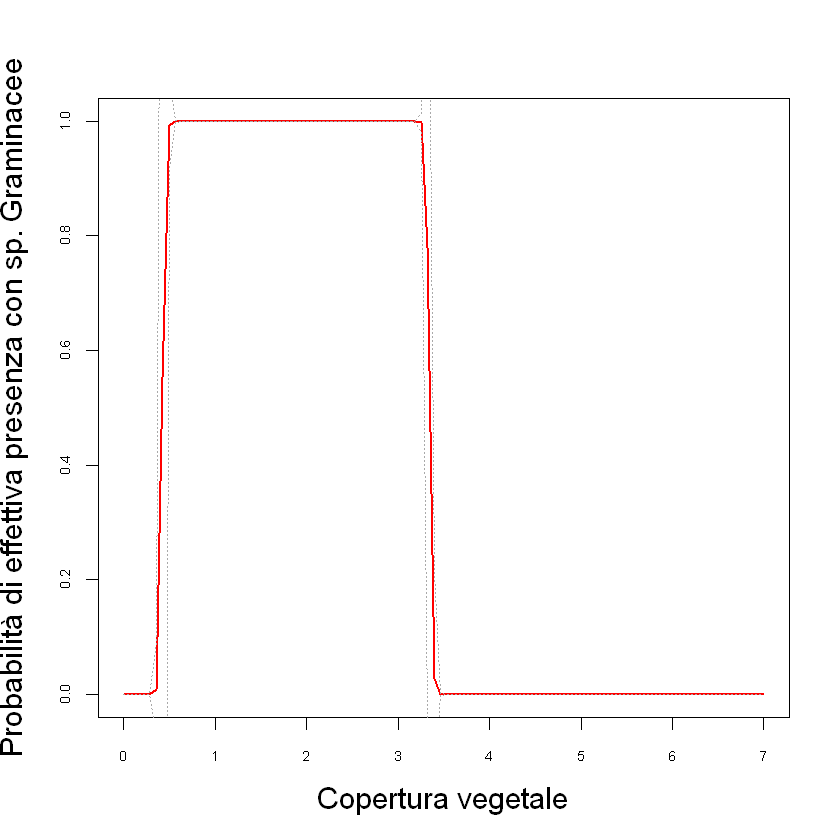

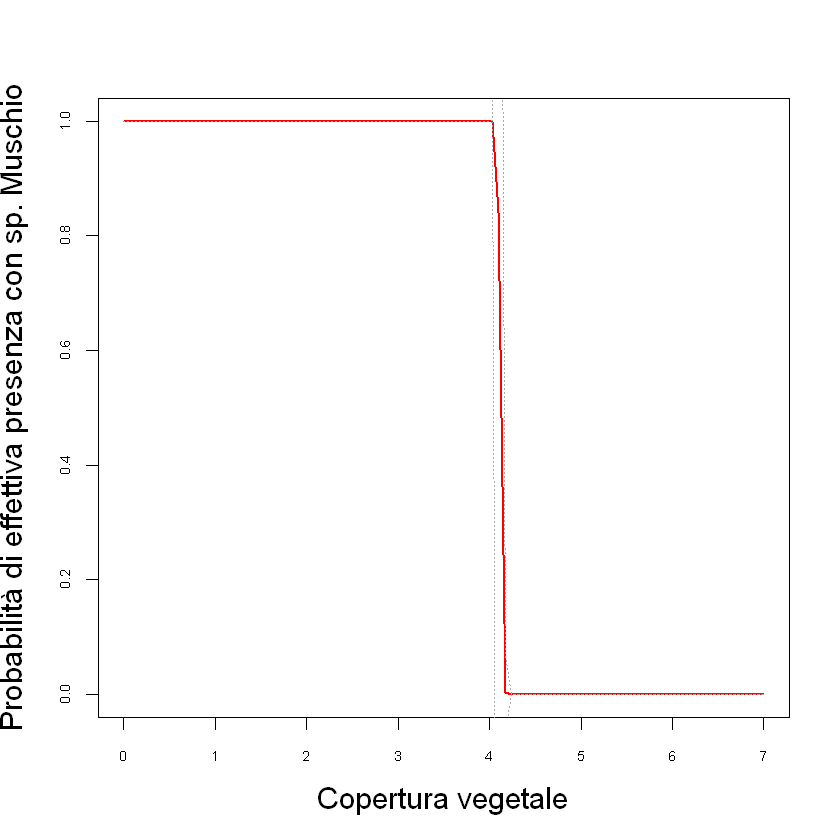

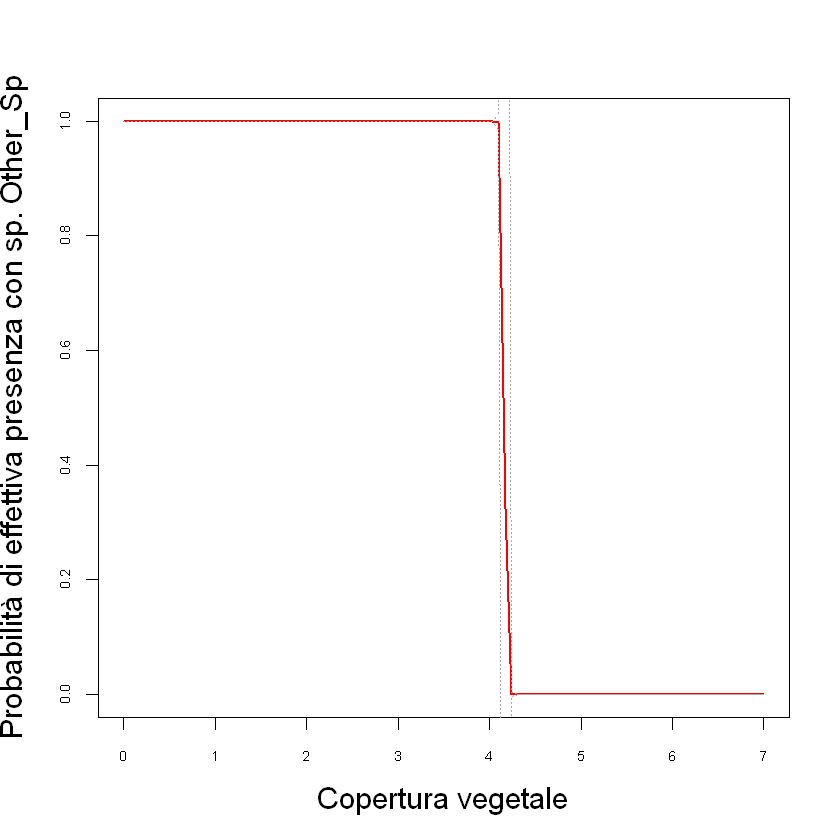

In [17]:
# VARIAMO cop_veg_ottavi

df_indicato <- siteCovs(arvicole)

cop_veg_ottavi.seq <- seq(min(df_indicato$cop_veg_ottavi, na.rm=TRUE), max(df_indicato$cop_veg_ottavi, na.rm=TRUE), length=100)
IQR.seq <- seq(min(df_indicato$IQR), max(df_indicato$IQR), length=100)

newdat_graminacee <- data.frame(
    cop_veg_ottavi = cop_veg_ottavi.seq,
    IQR = mean(df_indicato$IQR),
    dominant = "Graminacee"
)   
newdat_muschio <- data.frame(
    cop_veg_ottavi = cop_veg_ottavi.seq,
    IQR = mean(df_indicato$IQR),
    dominant = "Muschio"
)
newdat_other <- data.frame(
    cop_veg_ottavi = cop_veg_ottavi.seq,
    IQR = mean(df_indicato$IQR),
    dominant = "Other_Sp"
)
newdata <- rbind(newdat_graminacee,newdat_muschio,newdat_other)

## PREDICTION 
Elambda <- predict(best_mod, 
        type='state', 
        newdata = newdata,
        appendData = TRUE)

Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("cop_veg_ottavi","IQR"))
tail(Elambda_unscaled)

### grafici 
with(subset(Elambda_unscaled,dominant=="Graminacee"), {
  plot(cop_veg_ottavi, Predicted, xlab="Copertura vegetale", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Graminacee", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=1.5, cex.axis=0.7, lwd=2, col="red")
   lines(cop_veg_ottavi, Predicted+SE, lty=3, col="dark grey")
   lines(cop_veg_ottavi, Predicted-SE, lty=3, col="dark grey")
})
with(subset(Elambda_unscaled,dominant=="Muschio"), {
  plot(cop_veg_ottavi, Predicted, xlab="Copertura vegetale", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Muschio", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=1.5, cex.axis=0.7, lwd=2, col="red")
   lines(cop_veg_ottavi, Predicted+SE, lty=3, col="dark grey")
   lines(cop_veg_ottavi, Predicted-SE, lty=3, col="dark grey")
})

with(subset(Elambda_unscaled,dominant=="Other_Sp"), {
  plot(cop_veg_ottavi, Predicted, xlab="Copertura vegetale", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Other_Sp", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=1.5, cex.axis=0.7, lwd=2, col="red")
   lines(cop_veg_ottavi, Predicted+SE, lty=3, col="dark grey")
   lines(cop_veg_ottavi, Predicted-SE, lty=3, col="dark grey")
})

,cop_veg_ottavi,IQR,Predicted,SE,lower,upper,dominant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
295,2.56,188.2778,1,2.018577e-93,1.328290e-77,1,Other_Sp
296,2.56,190.2222,1,4.462126e-94,3.568456e-78,1,Other_Sp
297,2.56,192.1667,1,9.863170e-95,9.585958e-79,1,Other_Sp
298,2.56,194.1111,1,2.180066e-95,2.574893e-79,1,Other_Sp
299,2.56,196.0556,1,4.818386e-96,6.915950e-80,1,Other_Sp
300,2.56,198.0000,1,1.064909e-96,1.857437e-80,1,Other_Sp


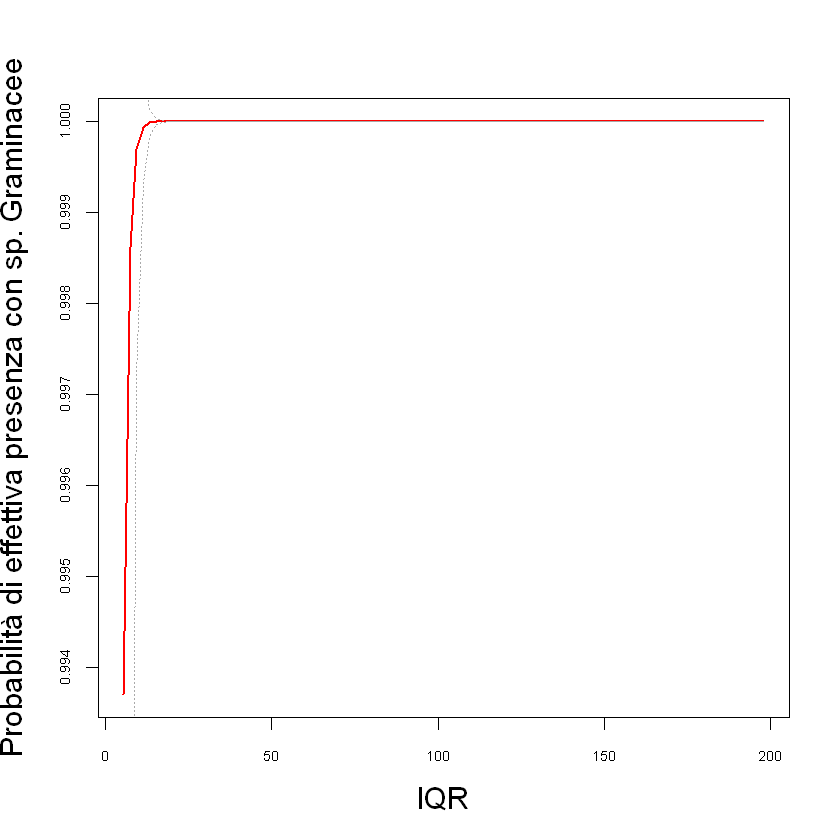

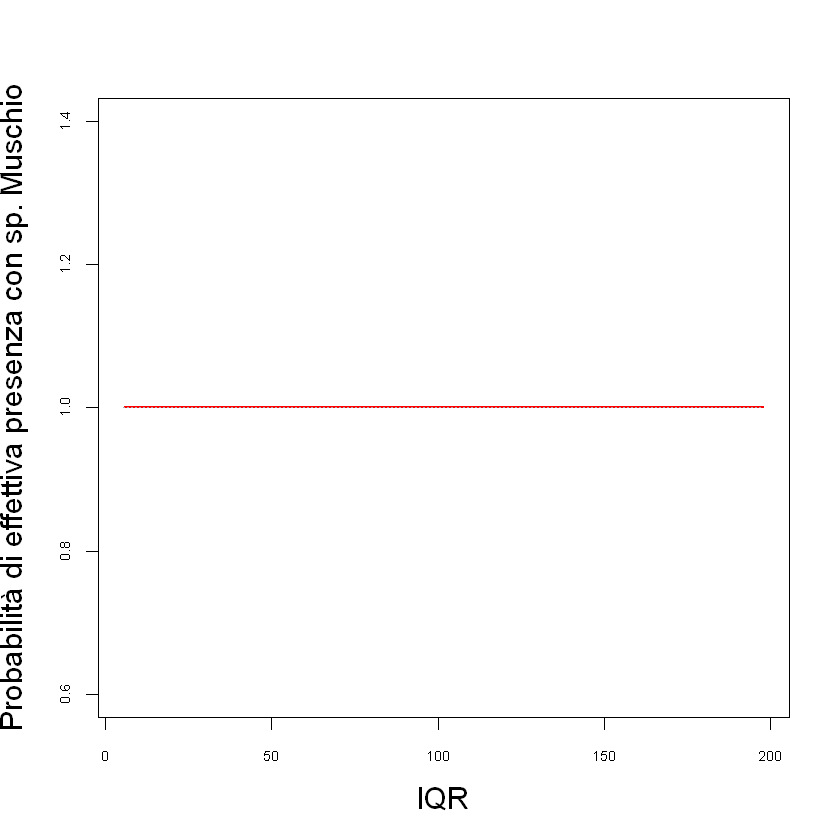

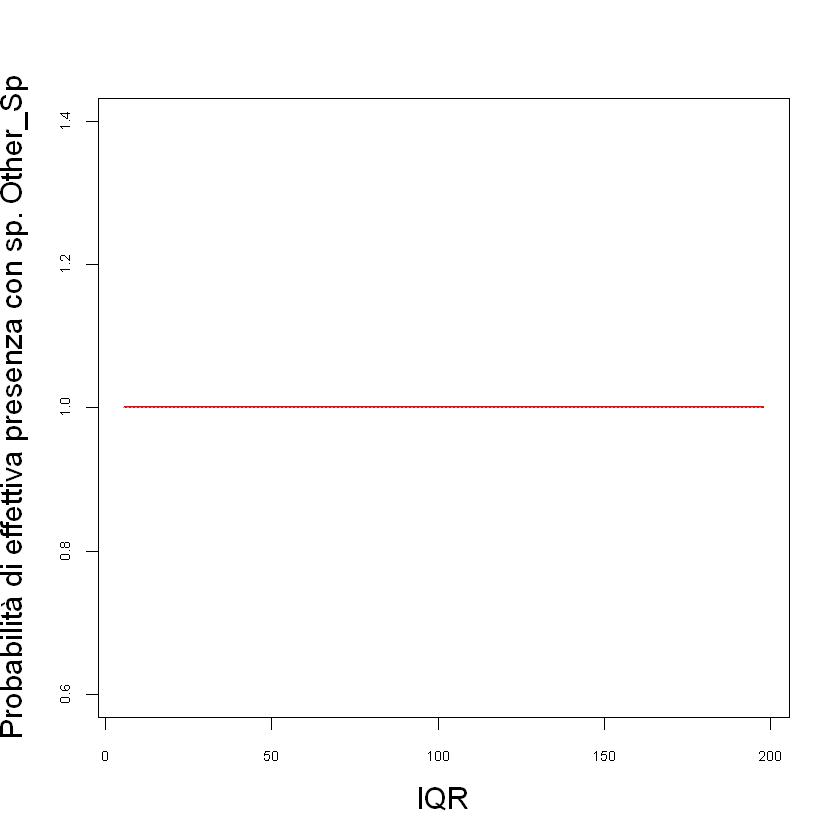

In [13]:
# VARIAMO IQR 
df_indicato <- siteCovs(arvicole)

cop_veg_ottavi.seq <- seq(min(df_indicato$cop_veg_ottavi, na.rm=TRUE), max(df_indicato$cop_veg_ottavi, na.rm=TRUE), length=100)
IQR.seq <- seq(min(df_indicato$IQR), max(df_indicato$IQR), length=100)

newdat_graminacee <- data.frame(
    cop_veg_ottavi = mean(df_indicato$cop_veg_ottavi, na.rm=TRUE),
    IQR = IQR.seq,
    dominant = "Graminacee"
)   
newdat_muschio <- data.frame(
    cop_veg_ottavi = mean(df_indicato$cop_veg_ottavi, na.rm=TRUE),
    IQR = IQR.seq,
    dominant = "Muschio"
)
newdat_other <- data.frame(
    cop_veg_ottavi = mean(df_indicato$cop_veg_ottavi, na.rm=TRUE),
    IQR = IQR.seq,
    dominant = "Other_Sp"
)
newdata <- rbind(newdat_graminacee,newdat_muschio,newdat_other)

## PREDICTION 
Elambda <- predict(best_mod, 
        type='state', 
        newdata = newdata,
        appendData = TRUE)

Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("cop_veg_ottavi","IQR"))
tail(Elambda_unscaled)

### grafici 
with(subset(Elambda_unscaled,dominant=="Graminacee"), {
  plot(IQR, Predicted, xlab="IQR", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Graminacee", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=1.5, cex.axis=0.7, lwd=2, col="red")
   lines(IQR, Predicted+SE, lty=3, col="dark grey")
   lines(IQR, Predicted-SE, lty=3, col="dark grey")
})
with(subset(Elambda_unscaled,dominant=="Muschio"), {
  plot(IQR, Predicted, xlab="IQR", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Muschio", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=1.5, cex.axis=0.7, lwd=2, col="red")
   lines(IQR, Predicted+SE, lty=3, col="dark grey")
   lines(IQR, Predicted-SE, lty=3, col="dark grey")
})

with(subset(Elambda_unscaled,dominant=="Other_Sp"), {
  plot(IQR, Predicted, xlab="IQR", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Other_Sp", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=1.5, cex.axis=0.7, lwd=2, col="red")
   lines(IQR, Predicted+SE, lty=3, col="dark grey")
   lines(IQR, Predicted-SE, lty=3, col="dark grey")
})

## RISULTATO: IQR NON SEMBRA AVERE EFFETTO SULLA PREDIZIONE

### Proseguiamo con ulteriori valutazioni sulla temperatura, precipitazioni, vento ed orario di cattura

,unvals,Predicted,SE,lower,upper,temper,orario,vento,precip
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
95,74.14286,0.07200481,0.01958216,0.04185947,0.1211153,16.73333,Tr,1.531429,0.05714286
96,74.14286,0.07204358,0.01989884,0.04152310,0.1221387,16.86667,Tr,1.531429,0.05714286
97,74.14286,0.07208237,0.02021960,0.04118496,0.1231814,17.00000,Tr,1.531429,0.05714286
98,74.14286,0.07212117,0.02054425,0.04084534,0.1242432,17.13333,Tr,1.531429,0.05714286
99,74.14286,0.07216000,0.02087266,0.04050450,0.1253239,17.26667,Tr,1.531429,0.05714286
100,74.14286,0.07219885,0.02120467,0.04016268,0.1264232,17.40000,Tr,1.531429,0.05714286


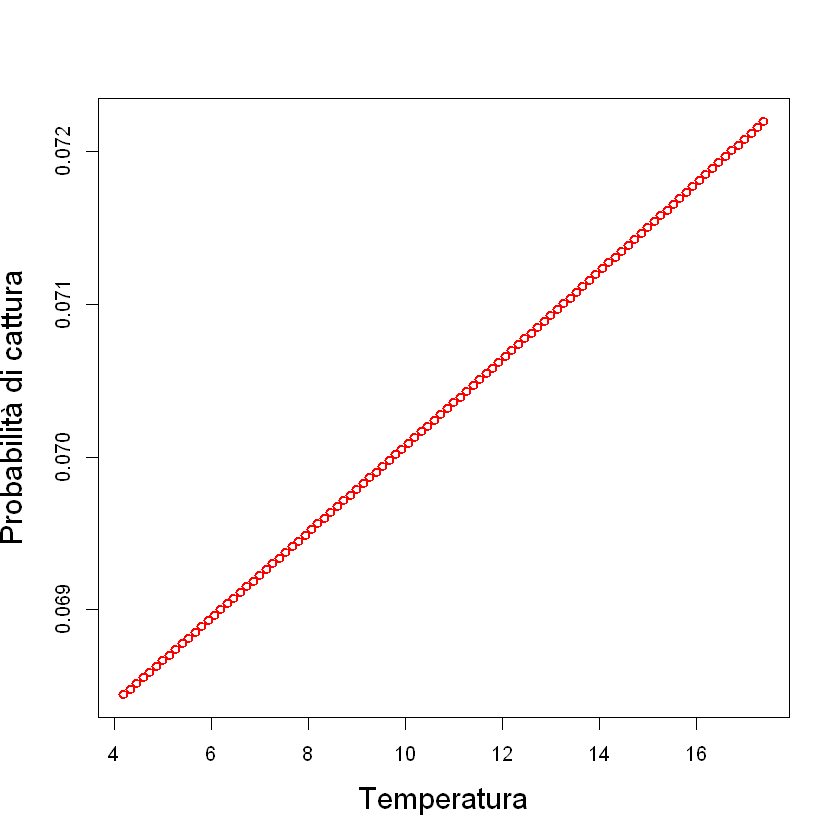

In [14]:
#### FACCIAMO VARIARE LA TEMPERATURA
df_indicato <- siteCovs(arvicole)
df_indicato2 <- obsCovs(arvicole)

MDR.seq <- seq(min(df_indicato$MDR), max(df_indicato$MDR), length=100)
temper.seq <- seq(min(df_indicato2$temper), max(df_indicato2$temper), length=100)
vento.seq <- seq(min(df_indicato2$vento), max(df_indicato2$vento), length=100)
precip.seq <- seq(min(df_indicato2$precip), max(df_indicato2$precip), length=100)

newdat_tempTr <- data.frame(
    MDR = mean(df_indicato$MDR),
    temper = temper.seq,
    orario = "Tr",
    vento = mean(df_indicato2$vento),
    precip = mean(df_indicato2$precip)
)

# PREDICT
Elambda <- predict(best_mod, 
        type='det', 
        newdata = newdat_tempTr,
        appendData = TRUE)

Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("MDR"))
tail(Elambda_unscaled)

#GRAFICI

with(Elambda_unscaled, {
    plot(temper, Predicted, xlab="Temperatura", type ="b",
        ylab="Probabilità di cattura",
        cex.lab=1.5, lwd=2, col="red")
    lines(temper , Predicted+SE, lty=3, col="dark grey")
    lines(temper , Predicted-SE, lty=3, col="dark grey")
})  

,unvals,Predicted,SE,lower,upper,temper,orario,vento,precip
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
95,74.14286,0.1120780,0.05857289,0.03829924,0.2857524,11.82,Tr,1.531429,0.9494949
96,74.14286,0.1126515,0.05938285,0.03811551,0.2891319,11.82,Tr,1.531429,0.9595960
97,74.14286,0.1132276,0.06019908,0.03793219,0.2925374,11.82,Tr,1.531429,0.9696970
98,74.14286,0.1138062,0.06102159,0.03774931,0.2959688,11.82,Tr,1.531429,0.9797980
99,74.14286,0.1143875,0.06185040,0.03756688,0.2994256,11.82,Tr,1.531429,0.9898990
100,74.14286,0.1149712,0.06268550,0.03738491,0.3029077,11.82,Tr,1.531429,1.0000000


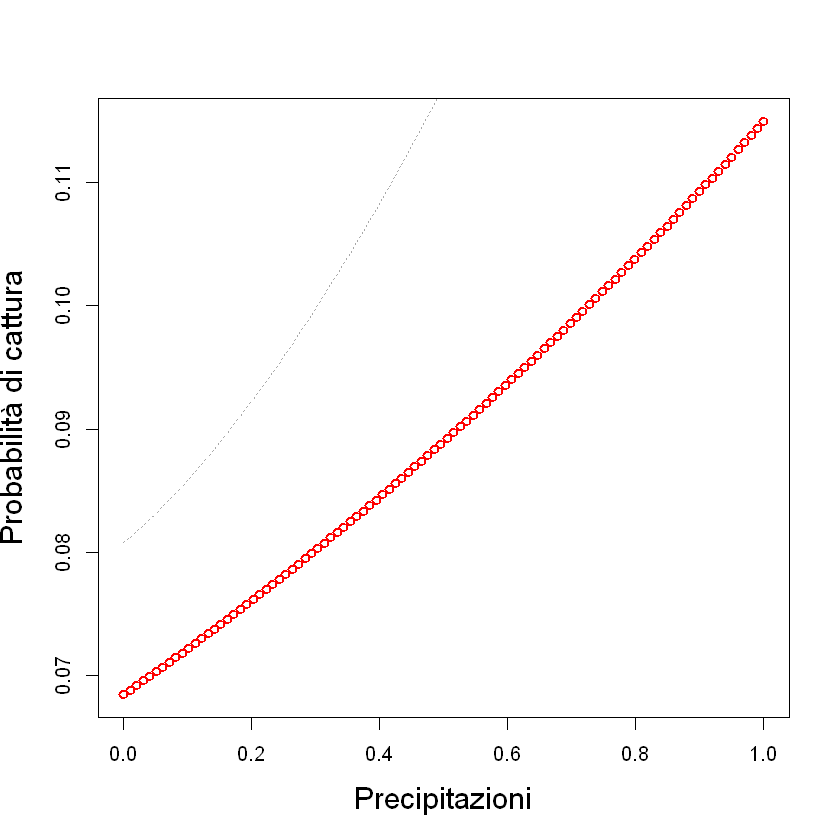

In [15]:
#### FACCIAMO VARIARE LA TEMPERATURA
df_indicato <- siteCovs(arvicole)
df_indicato2 <- obsCovs(arvicole)

MDR.seq <- seq(min(df_indicato$MDR), max(df_indicato$MDR), length=100)
temper.seq <- seq(min(df_indicato2$temper), max(df_indicato2$temper), length=100)
vento.seq <- seq(min(df_indicato2$vento), max(df_indicato2$vento), length=100)
precip.seq <- seq(min(df_indicato2$precip), max(df_indicato2$precip), length=100)

newdat_tempTr <- data.frame(
    MDR = mean(df_indicato$MDR),
    temper = mean(df_indicato2$temper),
    orario = "Tr",
    vento = mean(df_indicato2$vento),
    precip = precip.seq
)

# PREDICT
Elambda <- predict(best_mod, 
        type='det', 
        newdata = newdat_tempTr,
        appendData = TRUE)

Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("MDR"))
tail(Elambda_unscaled)

#GRAFICI

with(Elambda_unscaled, {
    plot(precip, Predicted, xlab="Precipitazioni",
        ylab="Probabilità di cattura",
        cex.lab=1.5, lwd=2, col="red")
    lines(precip , Predicted+SE, lty=3, col="dark grey")
   lines(precip , Predicted-SE, lty=3, col="dark grey")
})  

# SI TRATTA PROBABILMENTE DI UN VALORE LEGATO ALL'ARROTONDAMENTO DELLA VARIABILE PRECIP IN INPUT AL MODELLO

,unvals,Predicted,SE,lower,upper,temper,orario,vento,precip
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
95,74.14286,0.1247190,0.06389736,0.04328443,0.3097580,11.82,Tr,3.608081,0.05714286
96,74.14286,0.1259941,0.06538307,0.04308360,0.3158021,11.82,Tr,3.646465,0.05714286
97,74.14286,0.1272803,0.06688926,0.04288268,0.3219145,11.82,Tr,3.684848,0.05714286
98,74.14286,0.1285777,0.06841603,0.04268170,0.3280935,11.82,Tr,3.723232,0.05714286
99,74.14286,0.1298864,0.06996344,0.04248072,0.3343375,11.82,Tr,3.761616,0.05714286
100,74.14286,0.1312064,0.07153157,0.04227978,0.3406450,11.82,Tr,3.800000,0.05714286


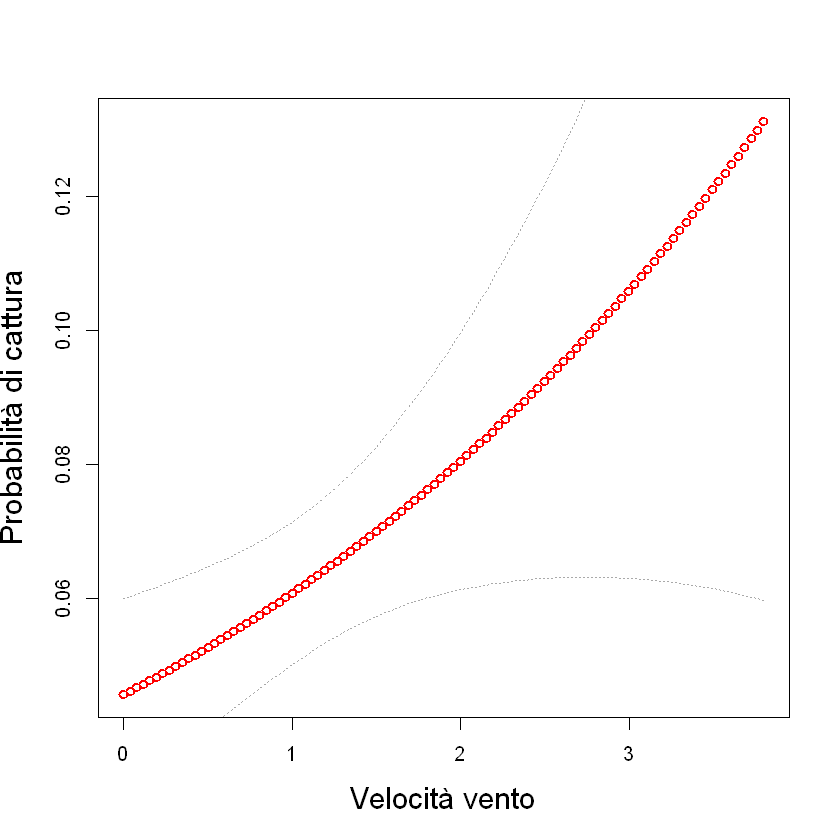

In [16]:
#### FACCIAMO VARIARE LA TEMPERATURA
df_indicato <- siteCovs(arvicole)
df_indicato2 <- obsCovs(arvicole)

MDR.seq <- seq(min(df_indicato$MDR), max(df_indicato$MDR), length=100)
temper.seq <- seq(min(df_indicato2$temper), max(df_indicato2$temper), length=100)
vento.seq <- seq(min(df_indicato2$vento), max(df_indicato2$vento), length=100)
precip.seq <- seq(min(df_indicato2$precip), max(df_indicato2$precip), length=100)

newdat_tempTr <- data.frame(
    MDR = mean(df_indicato$MDR),
    temper = mean(df_indicato2$temper),
    orario = "Tr",
    vento = vento.seq,
    precip = mean(df_indicato2$precip)
)

# PREDICT
Elambda <- predict(best_mod, 
        type='det', 
        newdata = newdat_tempTr,
        appendData = TRUE)

Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("MDR"))
tail(Elambda_unscaled)

#GRAFICI
with(Elambda_unscaled, {
    plot(vento, Predicted, xlab="Velocità vento",
        ylab="Probabilità di cattura",
        cex.lab=1.5, lwd=2, col="red")
    lines(vento , Predicted+SE, lty=3, col="dark grey")
   lines(vento , Predicted-SE, lty=3, col="dark grey")
})  

# ANCHE IN QUESTO CASO IL MODELLO NON RAPPRESENTA OTTIMAMENTE I DATI RACCOLTI E NON RISPECCHIA LE ANALISI ESPLORATIVI